Machine Learning IPN - Trabajo 15 marzo 2021 

Doncan Alexis Sánchez Rico

## Introducción

En el siguiente documento de trabajo, se presentan una serie de ejercicios relacionados al curso de Machine Learning del CIC-IPN. El 50% de estos ejercicios son obligatorios para la evaluación final. Deberá elegir al menos uno de cada dos ejercicios para resolverlos y enviarlos al correo dragonnomada123 con el sujeto *Machine Learning IPN - Trabajo 8 marzo 2021*. En el contenido del correo deberá especificar su nombre completo y adjuntar el archivo *.ipynb* que contenga los ejercicios resueltos, en la primera celda de la _notebook_ deberá repetir en el título *Machine Learning IPN - Trabajo 8 marzo 2021* y su nombre completo. No hay fecha de entrega obligatoria, pero si no recibe correo de confirmación de entrega, deberá ser responsable de insistir en la entrega y respuesta.

En este trabajo estaremos utilizando el dataset llamado `work/dataset/admission_predict.csv`. Cada problema tendrá una cantidad de puntos asignados según su complejidad. Junta al menos la mitad de puntos para validar este trabajo.

El trabajo consistirá en aplicar la regresión lineal a las múltiples columnas del dataset como `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR`, `CGPA`, `Research`, para determinar la columna `Chance of Admit`.

Deberemos recuperar las series de datos de cada columna y construir la matriz `X` y el vector `Y`. Luego con un regresor lineal `LinearRegression`, obtendremos el ajuste R<sup>2</sup>, para ir descartando columnas que no mejoren la preducción, hasta determinar el conjunto del mínimo columnas, que nos den el valor de preducción para `Chance of Admit`.

## 1. Cargar los datos (1 punto)

Abre el dataset `work/dataset/admission_predict.csv` con pandas y muestra las primeras 5 filas.

In [5]:
import pandas as pd
admission_pred = pd.read_csv("./datasets/admission_predict.csv")
admission_pred.head(5)
# admission_pred.columns

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2. Seleccionar las columnas de trabajo (2 puntos)

Selecciona las columnas del dataframe y construye la matriz X, o el dataframe X. Puedes renombrar cada columna como `x1`, `x2`, `x3`, ..., `xn`.

> Pista: Crea un nuevo *dataframe* con las series de cada columna como un eje (columna) `xn`.



In [112]:
X = pd.DataFrame({
    # "x1": admission_pred["Serial No."],
    # "x2": admission_pred["GRE Score"],
    "x3": admission_pred["TOEFL Score"],
    "x4": admission_pred["University Rating"],
    # "x5": admission_pred["SOP"],
    "x6": admission_pred["LOR "],
    "x7": admission_pred["CGPA"],
    "x8": admission_pred["Research"]
})
y = admission_pred["Chance of Admit "]

## 3. Visualiza cada eje respecto al valor de predicción (3 puntos)

Investiga como crear 7 gráficas usando `subplots` de *Matplotlib*, o usa un `for` para graficar cada eje respecto a `Chance of Admit`.

Por ejemplo, la gráfica tipo *scatter* de `GRE Score` vs `Chance of Admit`, la gráfica tipo *scatter* de `TOEFL Score` vs `Chance of Admit`, etc.

> Pista: https://matplotlib.org/stable/gallery/axes_grid1/demo_axes_grid.html#sphx-glr-gallery-axes-grid1-demo-axes-grid-py

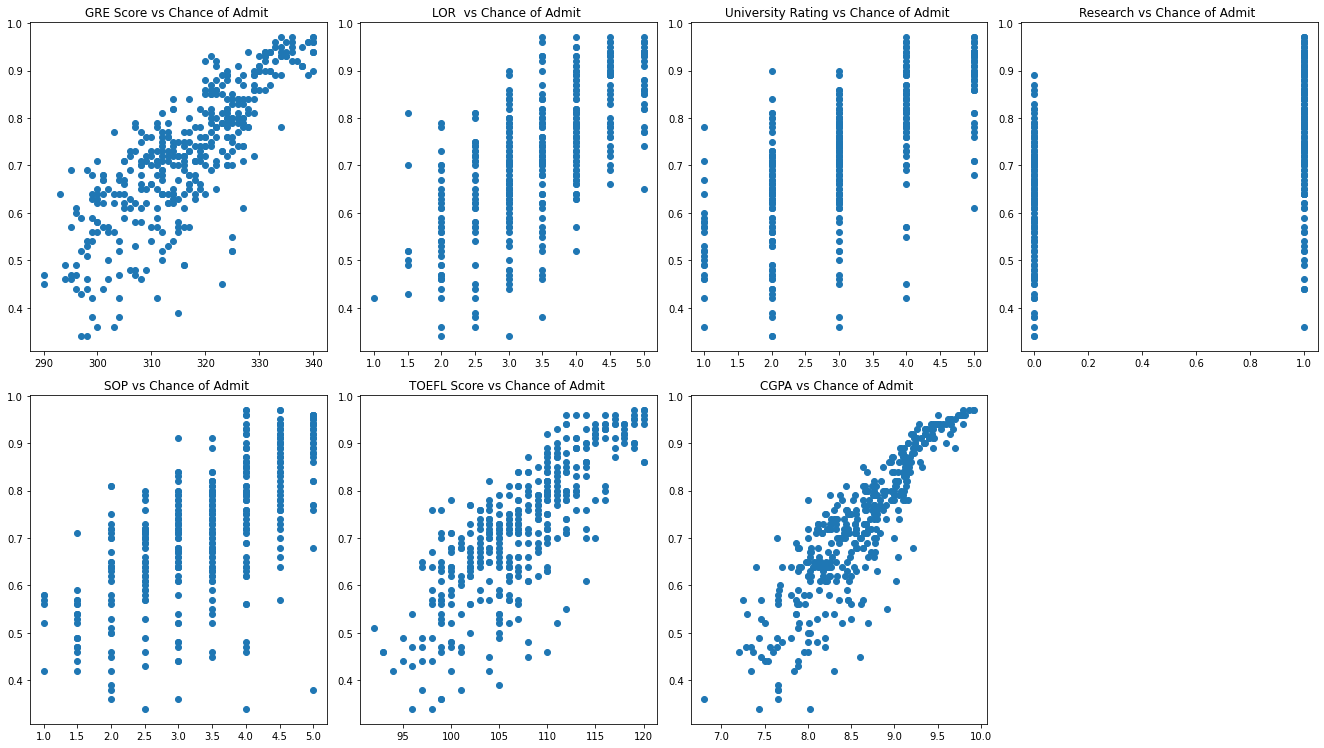

In [100]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 4)
columns_names = admission_pred.columns

def graph(coordenates, x, name):
    # print(y, x)
    axs[coordenates[0], coordenates[1]].scatter(x, y)
    axs[coordenates[0], coordenates[1]].set_title(name + " vs " + columns_names[-1])

# graph([0,0], X.x1, columns_names[0])
graph([0,0], X.x2, columns_names[1])
graph([1,1], X.x3, columns_names[2])
graph([0,2], X.x4, columns_names[3])
graph([1,0], X.x5, columns_names[4])
graph([0,1], X.x6, columns_names[5])
graph([1,2], X.x7, columns_names[6])
graph([0,3], X.x8, columns_names[7])

fig.delaxes(axs[1][3])
fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout()

## 4. Crea un regresor lineal (4 puntos)

Construye un regresor de la clase `LinearRegression` de *sklearn*.

Ajusta el regresor a `X`, `y`.

Obtén el `score` (R<sup>2</sup>) sobre `X`, `y`.

In [107]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y)

print("r2", reg.score(X, y))

r2 0.7989015932473845


## 5. Descarta ejes (2 puntos)

Descarta los ejes de pendiente cercana a 0, y deja sólo a los más significativos.

In [108]:
reg.coef_


array([0.00427463, 0.00522161, 0.02032318, 0.13132446, 0.03092204])

## 6. Visualización en 2D (4 puntos)

Crea una gráfica 2D con los dos ejes más representativos, dónde el color sea el eje correspondiente a `Chance of Admit`.

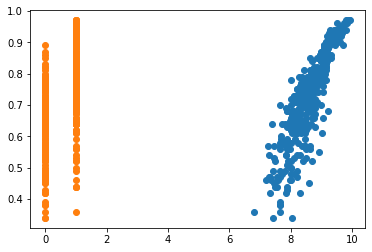

In [117]:
plt.scatter(X.x7, y)
plt.scatter(X.x8, y)
plt.show()

## 7. Visualización en 3D (4 puntos)

Crea una gráfica 3D con los dos ejes más representativos, y el plano ajustado correspondiente a `Chance of Admit`.

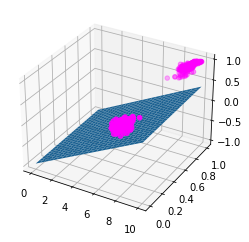

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X_eje = np.linspace(0, 10, 25)
Y_eje = np.linspace(0, 1, 25)

X_eje, Y_eje = np.meshgrid(X_eje, Y_eje) # ??
m_fit = reg.coef_
b_fit = reg.intercept_
Z = m_fit[-2] * X_eje + m_fit[-1] * Y_eje + b_fit

ax.plot_surface(X_eje, Y_eje, Z)
ax.scatter(X.x7, X.x8, y, c="magenta")



Total de puntos: 20

Mínimos requeridos: 10